*  DSC 540-T302 Data Preparation
*  Week 3 & 4 Exercise
*  Peter Lozano

# Activity 5.01: Reading Tabular Data from a Web Page and Creating DataFrames

page: 116

This exercise will require the following:
1. Open the page and view the source HTML to understand the structure.
2. Read the page using bs4
3. Find the table structure you will need to deal with (how many tables are there?).
4. Find the right table using bs4.
5. Separate the source names and their corresponding data.
6. Get the source names from the list of sources you have created.
7. Separate the header and data from the data that you separated before for the first source only, and then create a DataFrame using that.
8. Repeat the last task for the other two data sources.

The output should look like this:
| | Rank | Country | GDP (in millions) |
|--|------|---------|-------------------|
| 0 | | World | 80,683,787 |
| 1 | 1 | United States | 19,390,604|
| 2 | | European Union [23] | 17,277,698 |
| 3 | 2 | China [n 4] | 12,237,700 |
| 4 | 3 | Japan | 4,872,137 |

## Step 1: Open the page and view the source HTML to understand the structure.

I checked the page source provided in the book and found where the table is located within the HTML structure. The table is contained within `<table>` tags, and each row of the table is represented by `<tr>` tags, with headers in `<th>` tags and data in `<td>` tags.
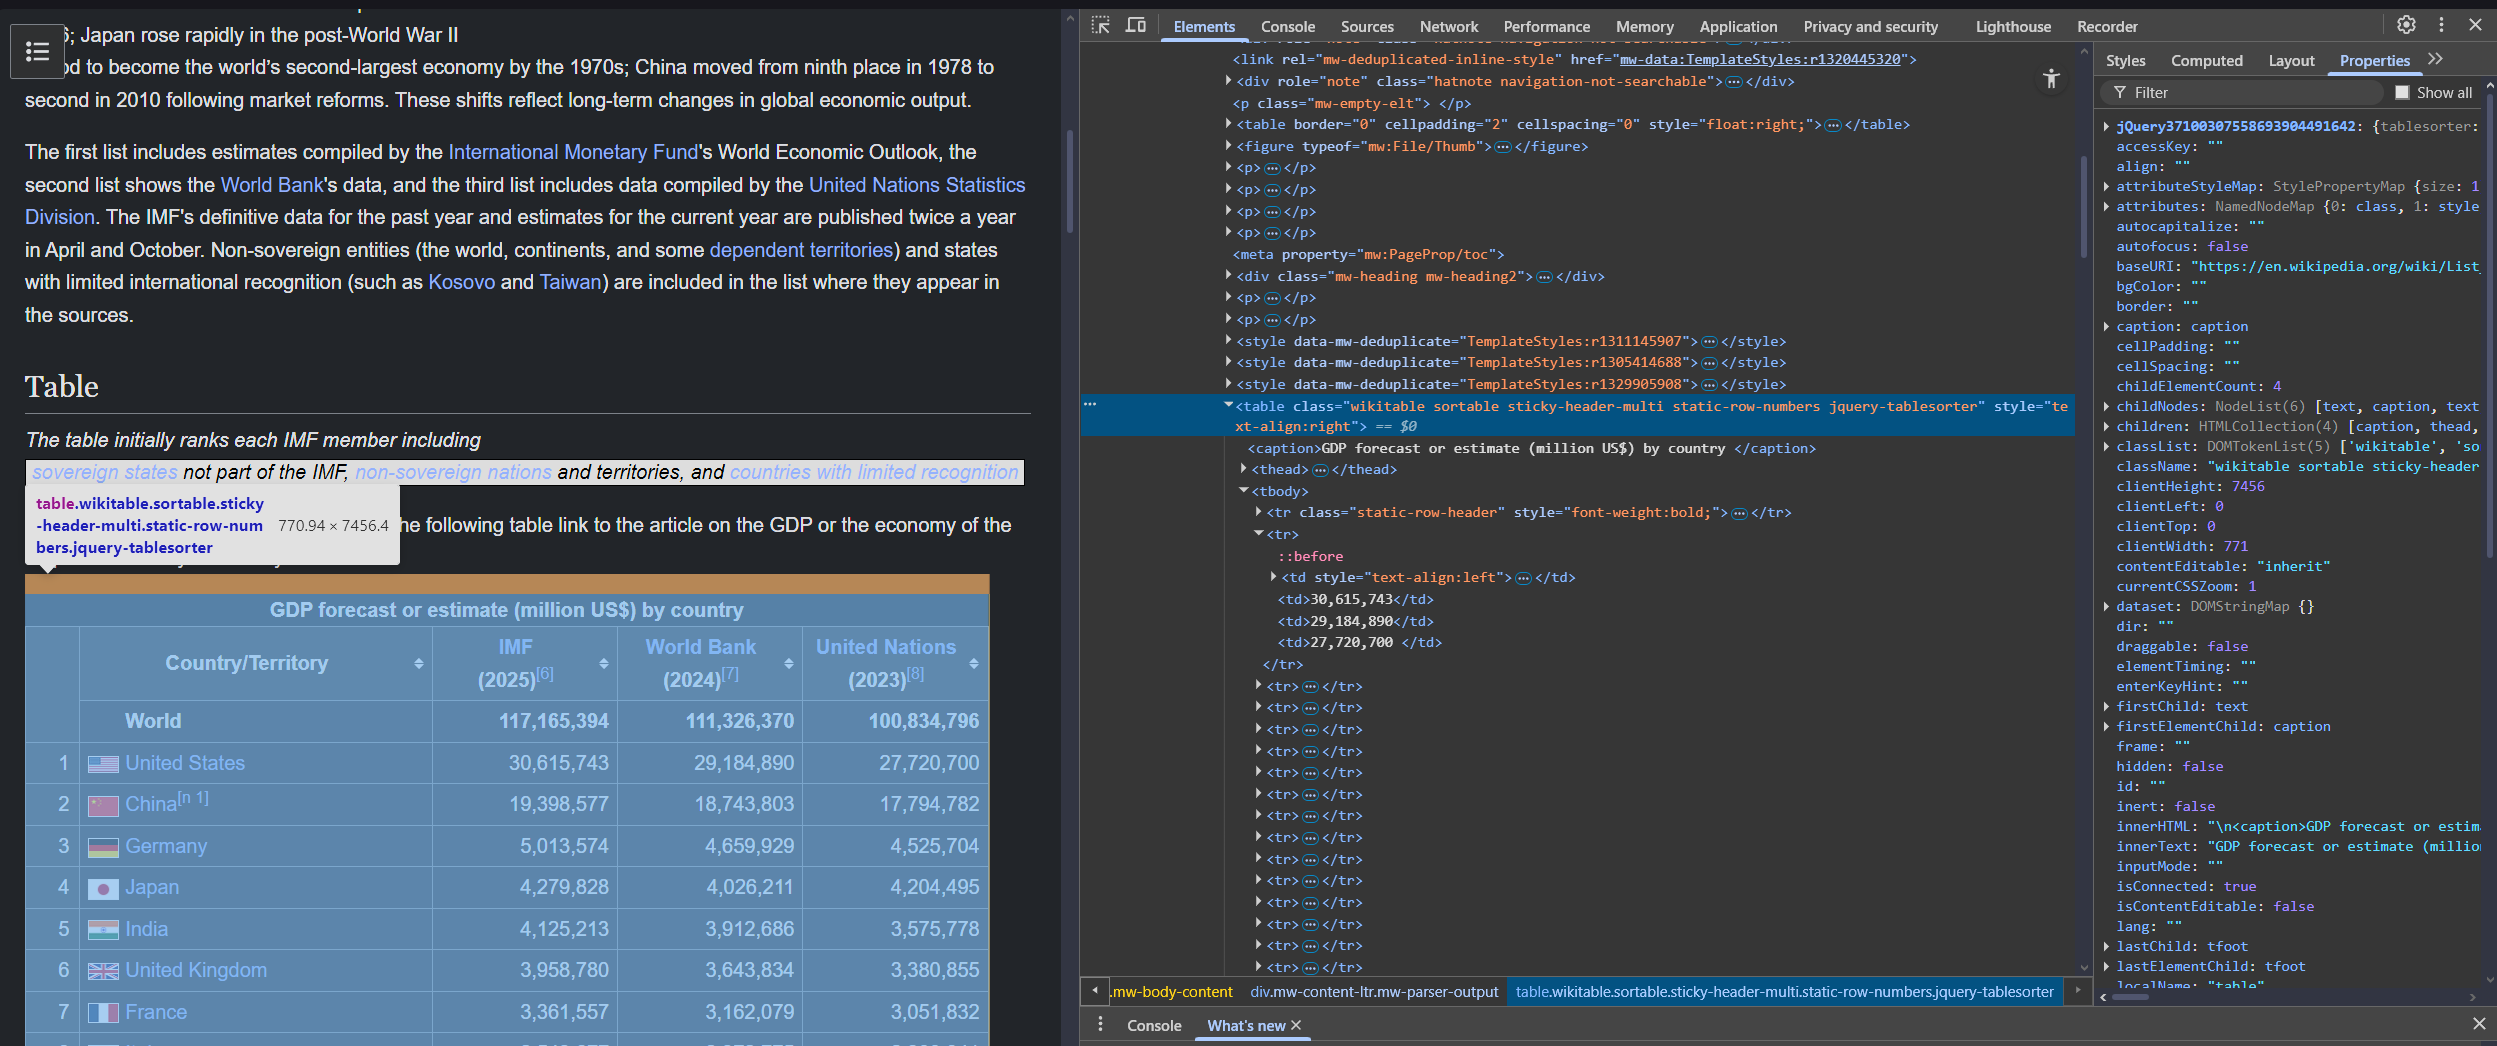

## Step 2: Read the page using bs4

Importing the necessary libraries

In [2]:
from bs4 import BeautifulSoup
import pandas as pd

Reading the HTML content

In [3]:
countries = open("../Chapter05/datasets/List of countries by GDP (nominal) - Wikipedia.htm", 'r', encoding='utf-8')
soup = BeautifulSoup(countries, 'html.parser')
countries.close()

## Step 3: Find the table structure

BeautifulSoup provides a method called `find_all` that allows us to locate all instances of a specific tag within the HTML. In this case, we are looking for all `<table>` tags to determine how many tables are present on the page.

In [4]:
# Exclude '< >' since it does not work in BeautifulSoup
all_tables = soup.find_all('table', class_=True) # Setting class_=True to find tables with any class attribute
print(f'There are {len(all_tables)} tables on the page.')

There are 8 tables on the page.


In [5]:
for i, t in enumerate(soup.find_all('table')):
    print(i, t.get('class'))  # None means no class attribute

0 None
1 ['"wikitable"|}']
2 ['wikitable', 'sortable', 'jquery-tablesorter']
3 ['wikitable', 'sortable', 'jquery-tablesorter']
4 ['wikitable', 'sortable', 'jquery-tablesorter']
5 ['nowraplinks', 'collapsible', 'uncollapsed', 'navbox-inner', 'mw-collapsible', 'mw-made-collapsible']
6 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner', 'mw-collapsible', 'mw-made-collapsible', 'mw-collapsed']
7 ['nowraplinks', 'hlist', 'collapsible', 'autocollapse', 'navbox-inner', 'mw-collapsible', 'mw-made-collapsible', 'mw-collapsed']
8 ['nowraplinks', 'navbox-subgroup']


There are 8 tables on the page excluding **1** that does not have a class attribute. This may just be a formatting table.

## Step 4: Find the right table using bs4.

Checking the list above, the table we are interested in should be the first one with the class attribute "wikitable". We can use the `find` method to locate this specific table by specifying the class name as it appears above.

In [6]:
data_table = soup.find('table', class_='"wikitable"|}')

print(type(data_table))

<class 'bs4.element.Tag'>


Now I'm in a good position to extract the data, headers, and source names from the table using parameters through `data_table`.

## Step 5: Separate the source names and their corresponding data.

Now that I have the data_table, I will need to separate the 3 different sources [`IMF`, `World Bank`, `United Nations`] and their corresponding data. Looking back at the source HTML, I can find the source name tag `<tr>` as shown below:
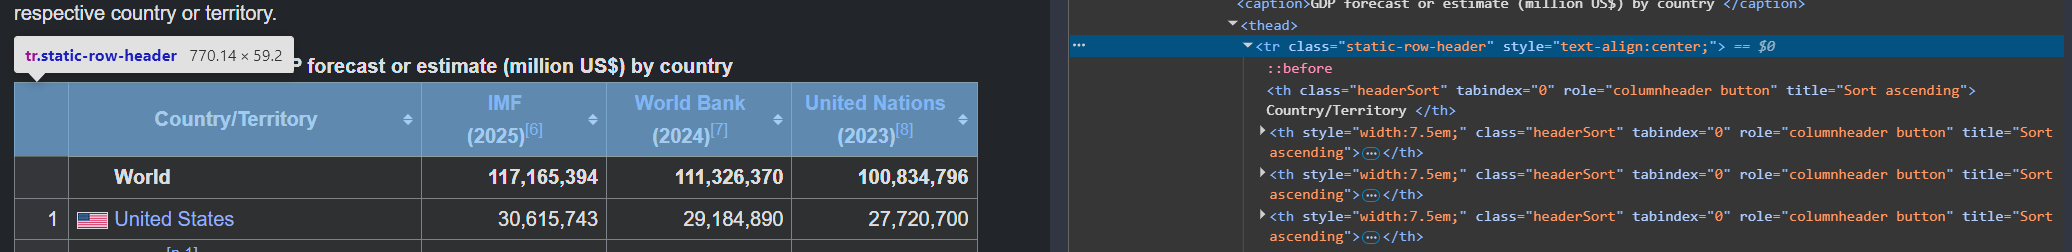

---
For the data of each source, I can see that it is represented by a `<tr>` tag within the `<tbody>` of the table. Each source's data is contained within `<td>` tags. Also, provided below:
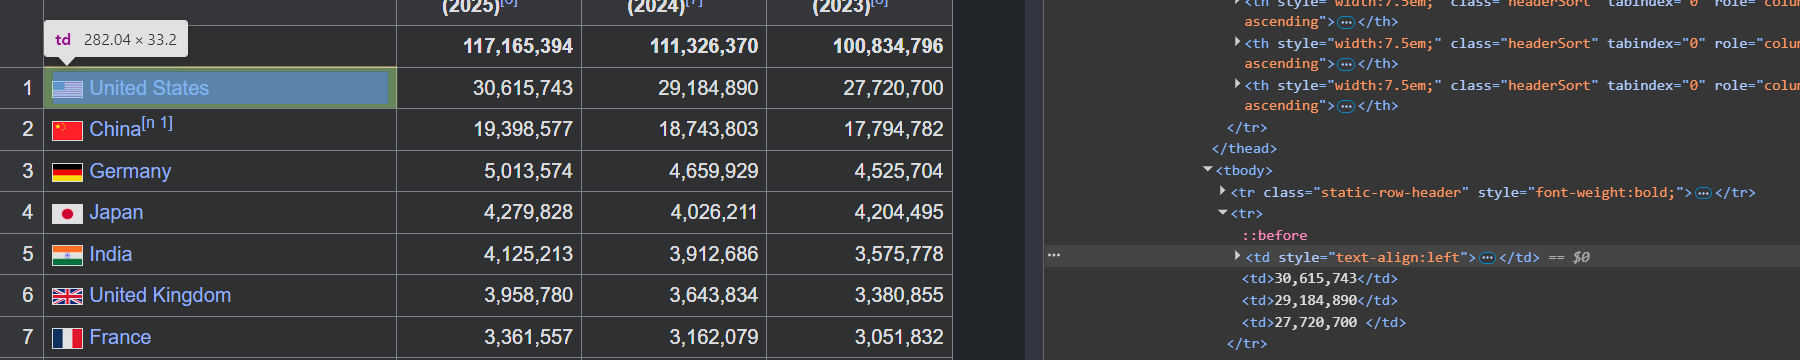

So, I need to focus on the `<td>` tags within each `<tr>` to extract the relevant data for each source.

Also, I have to use a parameter `recursive=False` in the `find_all` method to ensure that I only get the immediate child `<tr>` elements of the `<tbody>`, avoiding any nested tables or rows that might be present within the data. Although not present in the snapshots above, this might be hidden since I have not expanded all the rows within the snapshots.

In [7]:
# Finding the source names and their corresponding data
sources = data_table.tbody.find_all('tr', recursive=False)[0] # First row for source names

sources_list = []
for td in sources.find_all('td'):
    sources_list.append(td) # Extracting all <td> elements in the source row

print(sources_list)

[<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a> (2017)</b><sup class="reference" id="cite_ref-GDP_IMF_1-2"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">[1]</a></sup>
</td>, <td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/World_Bank" title="World Bank">World Bank</a> (2017)</b><sup class="reference" id="cite_ref-worldbank_20-0"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-worldbank-20">[20]</a></sup>
</td>, <td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/United_Nations" title="United Nations">United Nations</a> (2016)</b><sup class="reference" id="cite_ref-21"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-21">[21]</a></sup><sup class="r

I can see that the `sources_list` has returned my 3 sources correctly. Now, I just need to extract the text from each source name.

I do this by using a list comprehension that iterates over each source in the `sources_list` finding the `a` tag and extracting its text, passing `getText()`. I have to pass [**0**] to get the first element of the list returned by `find_all`.

## Step 6: Get the source names from the list of sources you have created.

In [8]:
# Initialize an empty list to hold source names
source_names = []

# Loop through each source in the sources_list to extract and print the source names
for source in sources_list:
    source_names.append(source.find_all('a')[0].getText())

source_names

['International Monetary Fund', 'World Bank', 'United Nations']

## Step 7: Separate the header and data from the data that you separated before for the first source only, and then create a DataFrame using that.

Now I need to extract the data for the first source. I can do this by extracting the body tags.

I pass `tbody` which focuses on the body of the table, then I use `find_all('tr', recursive=False)[1]` to get the second row of the table body, which contains the data for the source. Then, I use `find_all('td', recursive=False)` to get all the `<td>` tags within that row, which contain the actual data for the source.

In [9]:
data = data_table.tbody.find_all(
    # Tag name
    'tr',
    # Recursive set to False to only get direct children
    recursive=False
# Get all rows except the first one (which contains source names)
)[1].find_all(
    # Tag name for data cells
    'td', recursive=False
)

`data` holds all the data for the first source in the form of a list of `<td>` tags. Each `<td>` tag contains a nested structure of the data for each country, including rank, country name, and GDP value.

I will create a list called `data_tables` that will hold the data for each source. I will use a for loop to iterate over the range of the `data` variable and extract the data for each source.

In [10]:
data_tables = []

for td in data:
    data_tables.append(td.find_all('table'))

To obtain the header information, I need to know what tag to use. Now I need to separate the header columns and data from the source using `data_tables`. Below, I can see the tag that highlights the header information is found within the `<thead>` tag.

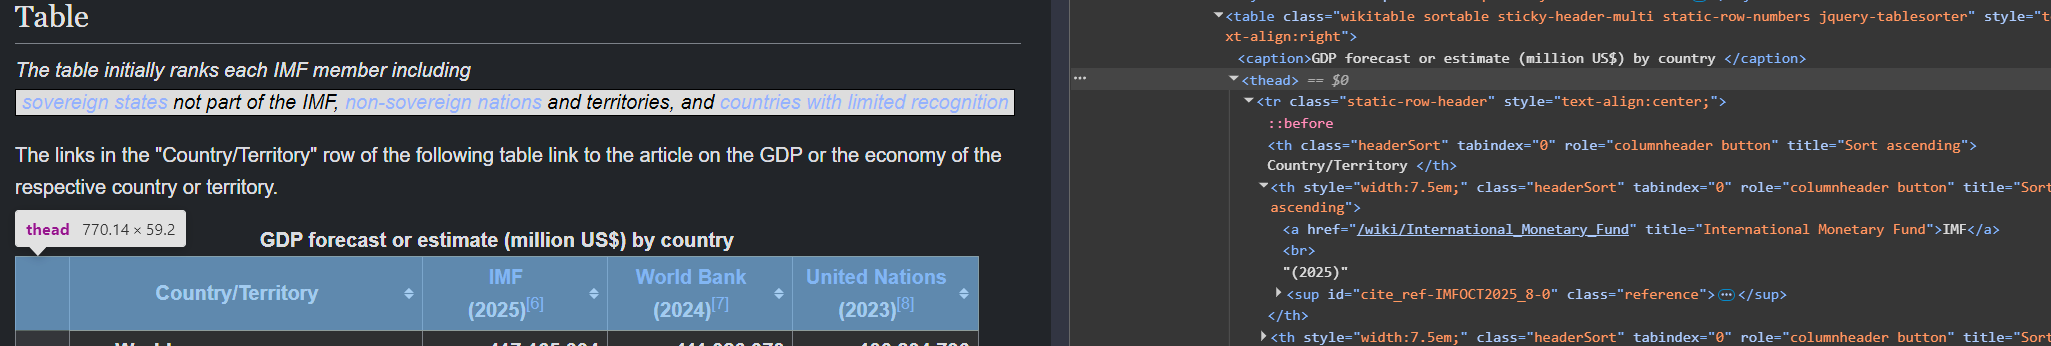

I just realized that I should have been using the original htm content instead of using the HTML with new content from Wikipedia. The reason why I can't continue with the new content is because I can't find the 'Rank' header in the new content and it appears to be required via the assignment. Luckily, the sites are still structured the same way so I can continue with the original content.

So, I need to extract the header information from the `<thead>` tag. I can do this by using the `find` method to locate the `<thead>` (*passed as a parameter*) tag and then using `find_all('th')` to get all the header cells.

In [11]:
header1 = [th.getText().strip() for th in data_tables[0][0].thead.find_all('th')]

header1

['Rank', 'Country', 'GDP(US$MM)']

>**Note:** I could also pass `th` as a parameter similar to how I did with `thead` above. However, this would only return the first instance of the `th` tag instead of all the instances. Therefore, I will use `find_all('th')` to get all the header cells.

Now that I have the header information, I need to extract the rows of data for the first source. I can do this by using a for loop to iterate over the `<tr>` tags within the `<tbody>` of the first source's data table, starting from index 1 to skip the header row.

In [12]:
rows1 = []
for tr in data_tables[0][0].tbody.find_all('tr')[1:]:
    
    rows1.append(tr)

`rows1` holds all the rows of data for the first source, excluding the header row. Each row is represented by a `<tr>` tag, and within each row, the individual data cells are represented by `<td>` tags.

In [13]:
# Initialize an empty list to hold the data rows for the first source
data_rows1 = []
for tr in rows1:
    row = []
    # Loop through each <td> in the current row and extract the text
    for td in tr.find_all('td'):
        # Append the cleaned text to the row list
        row.append(td.get_text().strip())
    data_rows1.append(row)


# Display first 5 rows of data_rows1
data_rows1[:5]

[['1', 'United States', '19,390,600'],
 ['2', 'China[n 1]', '12,014,610'],
 ['3', 'Japan', '4,872,135'],
 ['4', 'Germany', '3,684,816'],
 ['5', 'United Kingdom', '2,624,529']]

`data_rows1` holds the data for the first source in a structured format. Each entry in `data_rows1` is a list that contains the rank, country name, and GDP value for each country. This is possible because I used a nested list comprehension to iterate over each row in `rows1` and extract the text from each `<td>` tag.

In [14]:
df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


## Step 8: Repeat the last task for the other two data sources.

Since this is a repetitive task, I will create a function called `extract_source` that takes the index of the source as a parameter and returns the header and data rows for that source.

However, I noticed that I can't simply reuse the previous code as is because there are some differences in how the data is structured for each source. For example, the GDP values may be formatted differently or may contain additional information that needs to be cleaned up. Therefore, I will need to make some adjustments to the code to handle these differences.

See below for an example of how one of the sources contains extra cells that do not align with the header length

In [15]:
rows3 = []
for tr in data_tables[2][0].tbody.find_all('tr')[1:]:
    
    rows3.append(tr)

rows3[:1]

[<tr style="">
 <td align="right">1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="https://en.wikipedia.org/wiki/United_States" title="United States">United States</a></td>
 <td align="right"><span class="sortkey" style="display:none">7007186244750000000♠</span>18,624,475
 </td></tr>]

As you can see, the actual `GDP` value is in the second to last row but there is a hidden span with style "display:none".
This makes the table extract the extra 7007186244750000000♠ with my actual GDP value [**18,624,475**]. To prevent this, I'll use a `cell_text` function within the `extract_source` function to ensure that each cell is processed correctly, regardless of any hidden spans that may be present.

In [16]:
# Function to clean hidden elements and extract text
def cell_text(td):
    # Remove hidden span keys across all sources
    for element in td.select(
        "span[style*='display:none']"
    ):
        # Decompose removes the element from the tree
        element.decompose()
    
    # Remaining visible text
    txt = " ".join(td.stripped_strings)
    
    return txt

In [17]:
# Function to extract header and data rows for a given source index
def extract_source(data_tables, source_idx=0):
    table = data_tables[source_idx][0]

    # Header
    header = [th.get_text(strip=True) for th in table.thead.find_all('th')]

    # Rows (skip header)
    rows = table.tbody.find_all('tr')[1:]

    # Build data rows
    data_rows = []
    for tr in rows:
        # tds may have extra cells, so align to header length
        tds = tr.find_all('td')
        row = []
        # For each cell, align to header length
        for i, td in enumerate(
            # Limit header length to avoid extra cells
            tds[:len(header)]):
            row.append(cell_text(td))
        data_rows.append(row)

    return header, rows, data_rows

So this wiki page has some extra cells in some of the sources that do not align with the header length. Therefore, I had to create a supplementary logic to align the data cells with the header length. This ensures that each row of data corresponds correctly to the headers, even if there are extra cells present in some rows.

The header length alignment checks for uniformity in the number of cells per row. Some rows may contain additional information or notes that are not part of the main data set, leading to discrepancies in the number of cells per row. Thus, `cell_text` function is called within the `extract_source` function to ensure that each cell is processed correctly, regardless of any extra cells that may be present.


In [18]:
header2, rows2, data_rows2 = extract_source(data_tables, source_idx=1)
df2 = pd.DataFrame(data_rows2, columns=header2)

df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union [23],"17,277,698"
2,2,China [n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


Now, I can apply the `extract_source` function to each of the three sources and create DataFrames for each source using the extracted header and data rows by passing the source index as a parameter.

In [19]:
header3, rows3, data_rows3 = extract_source(data_tables, source_idx=2)
df3 = pd.DataFrame(data_rows3, columns=header3)

df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"18,624,475"
1,2,China [n 4],"11,218,281"
2,3,Japan,"4,936,211"
3,4,Germany,"3,477,796"
4,5,United Kingdom,"2,647,898"


# Activity 6.01: Handling Outliers and Missing Data

This activity will require the following:
1. Read the **visit_data.csv** file.
2. Check for duplicates.
3. Check whether any essential column contains NaN.
4. Get rid of the outliers.
5. Report the size difference.
6. Create a box plot to check for outliers.
7. Get rid of any outliers.

Final output should look like this:

*After getting rid of outliers the new size of the data is - 923*

### Step 1: Load libraries and read the visit_data.csv file

In [20]:
# Already have pandas imported
import numpy as np
import matplotlib.pyplot as plt

In [21]:
visit_data = pd.read_csv('../Chapter06/datasets/visit_data.csv')
visit_data.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


### Step 2: Check for duplicates

In [22]:
print(f"First Name is duplicated - {any(visit_data.first_name.duplicated())}")
print(f"Last Name is duplicated - {any(visit_data.last_name.duplicated())}")
print(f"Email is duplicated - {any(visit_data.email.duplicated())}")
print(f"IP Address is duplicated - {any(visit_data.ip_address.duplicated())}")

First Name is duplicated - True
Last Name is duplicated - True
Email is duplicated - False
IP Address is duplicated - False


I checked for duplicates in columns: `first_name`, `last_name`, `email`, and `ip_address`. The output indicates whether there are any duplicates in each of these columns.

I skipped `gender`, `id`, and `visit` because they would have legitimate reasons for duplicates or would not be duplicated at all.

### Step 3: Check whether any essential column contains NaN

In [23]:
print(f"Email contains NaN values - {visit_data.email.isna().any()}")
print(f"IP Address contains NaN values - {visit_data.ip_address.isna().any()}")
print(f"Visit contains NaN values - {visit_data.visit.isna().any()}")

Email contains NaN values - False
IP Address contains NaN values - False
Visit contains NaN values - True


The essential columns should be `email`, `ip_address`, and `visit`. The output indicates whether any of these columns contain NaN values.

As it shows, there are NaN values in the `visit` column. Getting rid of outliers will mean I need to remove these NaN values as well.

### Step 4: Get rid of the outliers

In [24]:
visit_data_cleaned = visit_data.dropna(subset=['visit'])
visit_data_cleaned

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


### Step 5: Report the size difference

In [25]:
print(f"The original dataset has {visit_data.shape[0]} rows.")
print(f"The cleaned dataset has {visit_data_cleaned.shape[0]} rows.")

The original dataset has 1000 rows.
The cleaned dataset has 974 rows.


### Step 6: Create a box plot to check for outliers

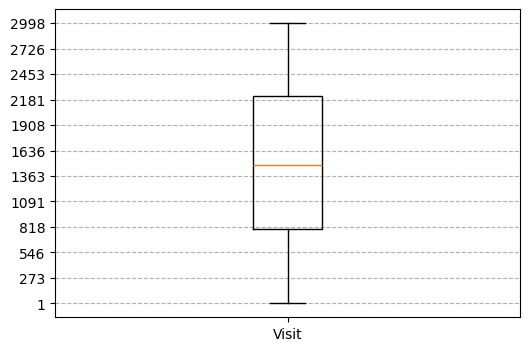

In [26]:
# Pass values to a variable for easier access
vals = visit_data_cleaned['visit']

# Create sub plot
fig, ax = plt.subplots(figsize=(6,4))

# Create box plot
ax.boxplot(visit_data_cleaned['visit'],
            tick_labels=['Visit'])

# Creating more y-ticks for better readability
yticks = np.linspace(np.nanmin(vals), np.nanmax(vals), 12)

# Set y-ticks and grid
ax.set_yticks(yticks)
ax.grid(True, axis='y', linestyle='--')

In [27]:
first, q1, q2, q3, q4 = np.percentile(vals, [0, 25, 50, 75, 100])
# iqr = q3 - q1
# lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
first, q1, q2, q3, q4

(np.float64(1.0),
 np.float64(794.5),
 np.float64(1477.0),
 np.float64(2224.25),
 np.float64(2998.0))

With the box plot, I can visually inspect the `visit` data for any outliers. The box plot displays the distribution of the `visit` data, including the median, quartiles, and potential outliers.

I can spot the ends of the whiskers that indicate the range of the data which appears to capture all the data points except for the NaN values which we already got rid of in Step 4.

I can make my own outlier judgment based on the box plot visualization. I know that data points beyond the whiskers are typically considered outliers. I can use an approximate range based on the box plot to identify and remove outliers from the dataset.

### Step 7: Get rid of any outliers

To get rid of outliers without estimating, I can use the interquartile range (IQR) method.

In [28]:
q1, q2, q4, q5 = np.percentile(vals, [0, 25, 75, 100])

q1, q2, q4, q5

(np.float64(1.0), np.float64(794.5), np.float64(2224.25), np.float64(2998.0))

I didn't need the 3rd quartile (median) for this calculation, so I only extracted quartiles 1, 2, 4, and 5.

I want to remove any data points that fall between quartiles 1 and 2 and between quartiles 4 and 5. I will lean heavily towards quartile 1 and quartile 5 since they represent the lower and upper bounds of the data distribution, respectively.

In [29]:
visit_data_filtered = visit_data_cleaned[
    # Removing data points less than 10
    (visit_data_cleaned['visit'] > 10) &
    # Removing data points greater than 2900
    (visit_data_cleaned['visit'] < 2900)
]

print(f"The cleaned dataset has {visit_data_cleaned.shape[0]} rows.")
print(f"The filtered dataset has {visit_data_filtered.shape[0]} rows.")

The cleaned dataset has 974 rows.
The filtered dataset has 942 rows.


# Insert data into a SQL Lite database

Refer to page 199 from Python for Data Analysis by Wes McKinney. Use the following code to create a database connection and insert the DataFrame you created in the previous exercise into a SQL Lite database.

### Step 1: Load libraries

In [30]:
# Already have pandas imported
import sqlite3

### Step 2: Create a table and connection to a newly created database

In [31]:
# Create a sample DataFrame
query = """
CREATE TABLE Employees
(Name VARCHAR(20), Address VARCHAR(200), City VARCHAR(50), State Varchar(20), Zip Varchar(10), Phone_Number VARCHAR(15));
"""
# Establish a connection to the SQLite database and execute the query
con = sqlite3.connect("Employee_Data.sqlite")

# Execute the query to create the table
con.execute(query)

# Commit the changes
con.commit()

### Step 3: Insert sample data into the database

Using Chat GPT to help with generating random data for this section.

I need to make sure that the structure of the sample data matches the structure of the database table.

In [32]:
        # Name,         Address,        City,     State,   Zip,   Phone_Number
data = [('John Doe', '123 Main St', 'Springfield', 'IL', '62701', '555-1234'),
        ('Jane Smith', '456 Oak Ave', 'Metropolis', 'NY', '10001', '555-5678'),
        ('Jim Brown', '789 Pine Rd', 'Gotham', 'NJ', '07001', '555-8765'),
        ('Emily Davis', '321 Maple St', 'Smallville', 'KS', '66002', '555-4321'),
        ('Michael Wilson', '654 Cedar Ave', 'Star City', 'CA', '90001', '555-3456'),
        ('Sarah Johnson', '987 Birch Rd', 'Central City', 'OH', '43001', '555-6543'),
        ('David Lee', '159 Walnut St', 'Coast City', 'FL', '32004', '555-7890'),
        ('Laura Martinez', '753 Chestnut Ave', 'Blüdhaven', 'PA', '19019', '555-0987'),
        ('Robert Garcia', '852 Spruce Rd', 'Ivy Town', 'VA', '22003', '555-4567'),
        ('Linda Rodriguez', '951 Aspen St', 'Fawcett City', 'MI', '48001', '555-7654'),
]

### Step 4: Pass the data to the SQL Lite database

In [33]:
# Pass statement to insert data into the Employees table
stmt = "INSERT INTO Employees (Name, Address, City, State, Zip, Phone_Number) VALUES (?, ?, ?, ?, ?, ?);"

# Execute the insert statement for all data entries
con.executemany(stmt, data)

# Commit the changes to the database
con.commit()

For the statement to work, I need to make sure that the table name and column names in the SQL statement match those in the data.

Then, I pass VALUES with placeholders (?) for each column in the table. This allows me to insert data into the table without hardcoding specific values, making it easier to insert multiple rows of data programmatically.

### Step 5: Return the data from the created database to confirm the data was inserted correctly

In [34]:
cursor = con.execute("SELECT * FROM Employees;")

rows = cursor.fetchall()

rows

[('John Doe', '123 Main St', 'Springfield', 'IL', '62701', '555-1234'),
 ('Jane Smith', '456 Oak Ave', 'Metropolis', 'NY', '10001', '555-5678'),
 ('Jim Brown', '789 Pine Rd', 'Gotham', 'NJ', '07001', '555-8765'),
 ('Emily Davis', '321 Maple St', 'Smallville', 'KS', '66002', '555-4321'),
 ('Michael Wilson', '654 Cedar Ave', 'Star City', 'CA', '90001', '555-3456'),
 ('Sarah Johnson', '987 Birch Rd', 'Central City', 'OH', '43001', '555-6543'),
 ('David Lee', '159 Walnut St', 'Coast City', 'FL', '32004', '555-7890'),
 ('Laura Martinez',
  '753 Chestnut Ave',
  'Blüdhaven',
  'PA',
  '19019',
  '555-0987'),
 ('Robert Garcia', '852 Spruce Rd', 'Ivy Town', 'VA', '22003', '555-4567'),
 ('Linda Rodriguez',
  '951 Aspen St',
  'Fawcett City',
  'MI',
  '48001',
  '555-7654')]

It works! Now let's convert it into a something more readable like a DataFrame.

In [35]:
pd.DataFrame(rows,
             # Explicitly defining column names
             columns=["Name", "Address", "City", "State", "Zip", "Phone_Number"]
)

,Name,Address,City,State,Zip,Phone_Number
0,John Doe,123 Main St,Springfield,IL,62701,555-1234
1,Jane Smith,456 Oak Ave,Metropolis,NY,10001,555-5678
2,Jim Brown,789 Pine Rd,Gotham,NJ,07001,555-8765
3,Emily Davis,321 Maple St,Smallville,KS,66002,555-4321
4,Michael Wilson,654 Cedar Ave,Star City,CA,90001,555-3456
5,Sarah Johnson,987 Birch Rd,Central City,OH,43001,555-6543
6,David Lee,159 Walnut St,Coast City,FL,32004,555-7890
7,Laura Martinez,753 Chestnut Ave,Blüdhaven,PA,19019,555-0987
8,Robert Garcia,852 Spruce Rd,Ivy Town,VA,22003,555-4567
9,Linda Rodriguez,951 Aspen St,Fawcett City,MI,48001,555-7654
